In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
# Read the dataset as a pandas dataframe
df = pd.read_csv("boostingclassifier.csv")
df.head()

,latitude,longitude,landtype
0,-0.070288,-1.143493,0
1,0.521946,-0.043497,1
2,-0.708091,-0.870615,0
3,0.729733,-0.045884,1
4,-1.760767,-1.789587,0


In [8]:
# Read the columns latitude and longitude as the predictor variables
X = df[['latitude','longitude']].values

# Landtype is the response variable
y = df['landtype'].values

In [9]:
y = np.where(y == 0, -1, 1)

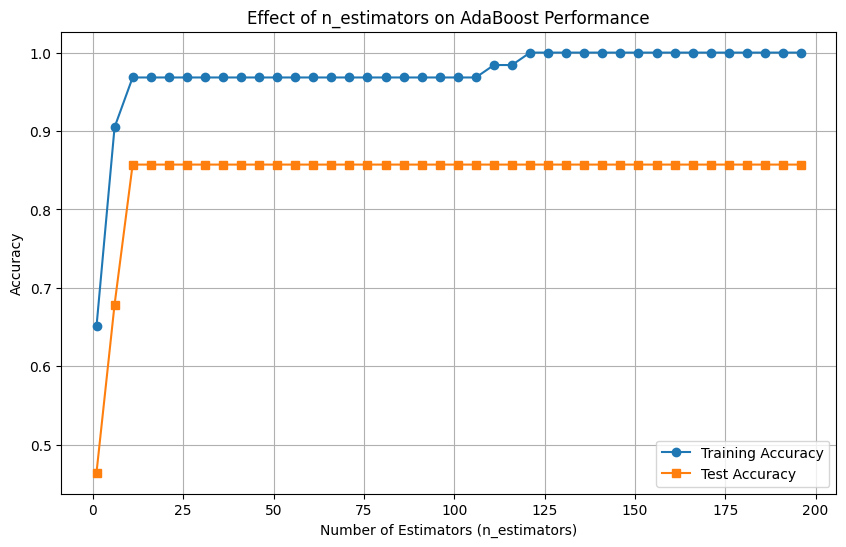

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a range of n_estimators
n_estimators_range = np.arange(1, 201, 5)  # From 1 to 200, step of 5

train_accuracies = []
test_accuracies = []

# Train AdaBoost with different values of n_estimators
for n in n_estimators_range:
    model = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),  # Decision stump
        n_estimators=n,
        random_state=42
    )
    model.fit(X_train, y_train)

    # Compute accuracy
    train_accuracies.append(accuracy_score(y_train, model.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, model.predict(X_test)))

# Plot training and test accuracy
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_accuracies, label="Training Accuracy", marker='o')
plt.plot(n_estimators_range, test_accuracies, label="Test Accuracy", marker='s')

# Formatting the plot
plt.xlabel("Number of Estimators (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Effect of n_estimators on AdaBoost Performance")
plt.legend()
plt.grid(True)
plt.show()